## Activity 02
### Tyler Barna

In [96]:
## import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import binom
import random
random.seed(5731) ## set seed for reproducibility

## import data (had to manually alter data slightly due to separators being inconsistent)
df = pd.read_csv('Laufman_Table2.dat', sep=' ', skiprows=1,header=None,names=['gal','comp','gp'])
df['comp'] = df['comp'].astype(int)
df['gp'] = df['gp'].astype(int)
df.head()

,gal,comp,gp
0,J094458.22-004545.4,1,0
1,J130211.15-000516.4,0,0
2,J232539.23+004507.2,0,0
3,J032244.89+004442.3,0,0
4,J012910.15+145934.6,0,0


#### 1

In [97]:
print('number of galaxies: %s'%df.shape[0])
print('number of green peas: %s'%df[df['gp'] == 0].shape[0])
print('number of normal galaxies: %s'%df[df['gp'] != 0].shape[0])
print('number of galaxies without a companion: %s'%df[df['comp'] == 0].shape[0])
print('number of galaxies with a companion: %s'%df[df['comp'] != 0].shape[0])
print('number of galaxies with a green pea companion: %s'%df[(df['comp'] != 0) & (df['gp'] == 0)].shape[0])
print('number of galaxies with a normal companion: %s'%df[(df['comp'] != 0) & (df['gp'] != 0)].shape[0])


number of galaxies: 66
number of green peas: 23
number of normal galaxies: 43
number of galaxies without a companion: 62
number of galaxies with a companion: 4
number of galaxies with a green pea companion: 4
number of galaxies with a normal companion: 0


Visually inspecting the data, we can see that there are about 66 galaxies. About two thirds of these galaxies are 'normal' galaxies, with the other third being green peas. There are only 4 galaxies with companions, all of which are green peas, which meets expectations.

This data is different from last week in that, while it is also observational data, it only contains binary values (ie whether or not there's a companion, whether or not a galaxy is a green pea). There are also no parameters regarding the certainty of a given measurment, as was the case last week when there was a distinction between known good observations and problematic measurements.

#### 2

Given our discussions in class this week, we can easily justify that this should be a binomial distribution, and we can use this to look at the probability of observing a green pea galaxy having a companion.

For our posterior, we take a beta distribution and we can make a basic assumption that 
\begin{equation}
\theta = [0,1]
\end{equation}
and 
\begin{equation}
a,b = 1,1
\end{equation}

Our x represents the number of green pea galaxies with a companion
\begin{equation}
x = 4
\end{equation}
and our n is the number of green pea galaxies 
\begin{equation}
n = 23
\end{equation}

Therefore, the likelihood is 
\begin{equation}
X | \theta \sim \text{Binomial}(x=4, \theta)
\end{equation}

and the prior is
\begin{equation}
\theta \sim \text{Beta}(a=1, b=1)
\end{equation}

The posterior is then
\begin{equation}
\theta | x \sim \text{Beta}(a+x=5, n+b-x=20)
\end{equation}

The expected $\theta$ is given by 
\begin{equation}
\mathbb{E}[\theta] = \frac{a}{a+b}
\end{equation} 

so the expected theta for our prior is 
\begin{equation}
\mathbb{E}[\theta] = \frac{1}{2} = 0.5
\end{equation}

and the expected theta for our posterior is
\begin{equation}
\mathbb{E}[\theta] = \frac{5}{25} = 0.2
\end{equation}


#### 3

In [98]:
## start building a statistical model, specifically for a binomial distribution
## first, we need to define the parameters of the binomial distribution
a, b = 1, 1 ## prior assumption
## mean and variance of the priors
mean, var= beta.stats(a, b, moments='mv')

## number of green peas with a companion
x_gp = df[(df['comp'] != 0) & (df['gp'] == 0)].shape[0]
##number of green peas
n_gp = df[df['gp'] == 0].shape[0]
x_gp, n_gp

## calculate the posterior distribution
a_post = a + x_gp
b_post = b + n_gp - x_gp
mean_post, var_post = beta.stats(a_post, b_post, moments='mv')

#### 4

posterior maxiumum: 0.17171717171717174


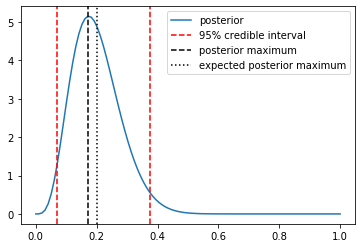

In [99]:
## plot the prior and posterior distributions
linspace = np.linspace(0,1,100)
#plt.plot(linspace, beta.pdf(linspace,  a, b), label='prior') ## prior isn't very informative
plt.plot(linspace, beta.pdf(linspace,  a_post, b_post), label='posterior')


## calculate tbe position of the posterior's maximum

max_post = np.argmax(beta.pdf(linspace,  a_post, b_post))
max_post_x = linspace[max_post]
print('posterior maxiumum: %s'%max_post_x)

## calculate the 95% credible interval
min_95, max_95 = beta.interval(0.95, a_post, b_post)

## plot the 95% credible interval
plt.axvline(x=min_95, color='r', linestyle='--')
plt.axvline(x=max_95, color='r', linestyle='--',label='95% credible interval')
plt.axvline(x=max_post_x, color='k', linestyle='--',label='posterior maximum')
plt.axvline(x=0.2, linestyle=':',label='expected posterior maximum',color='black')

plt.legend();